In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv("./House Price Prediction Dataset.csv")
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [8]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [9]:
dup = df.duplicated()
print(f"Number of duplicate rows: {dup.sum()}")


Number of duplicate rows: 0


C:\Users\PMLS\AppData\Local\Temp\ipykernel_18240\3832168543.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=decade_counts, x='Decade', y='Id', palette='Blues_d')


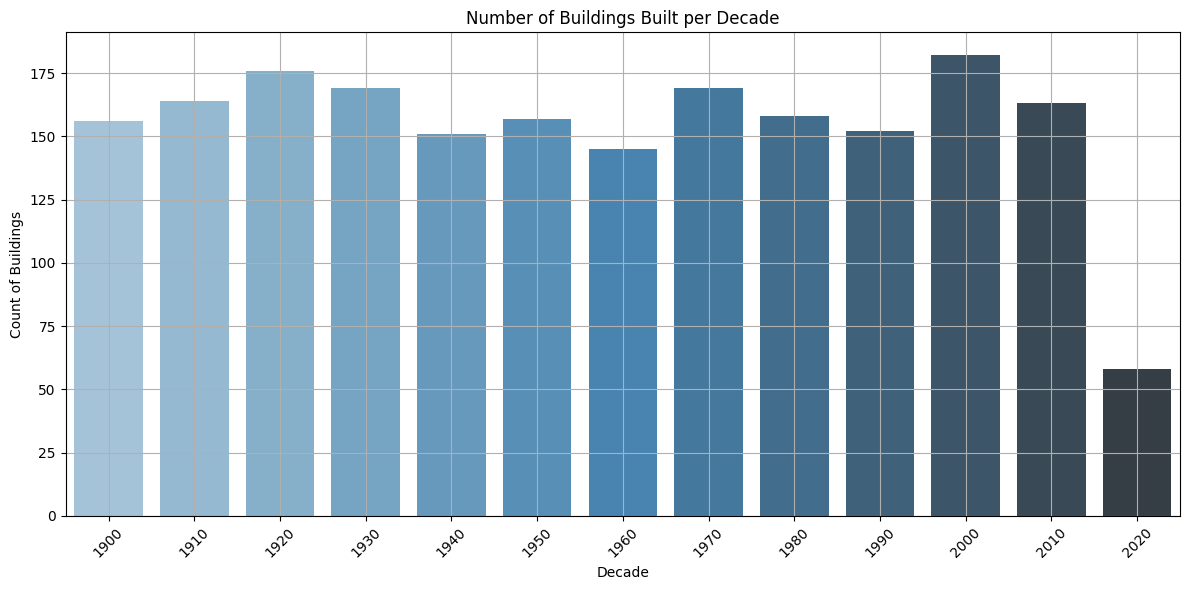

In [10]:
# Create a new column to group by decades
df['Decade'] = (df['YearBuilt'] // 10) * 10

# Group by Decade and count the number of buildings (Id)
decade_counts = df.groupby('Decade')['Id'].count().reset_index()

# Create a figure for the plot
plt.figure(figsize=(12, 6))

# Create a barplot showing the number of buildings for each decade
sns.barplot(data=decade_counts, x='Decade', y='Id', palette='Blues_d')

# Add titles and labels
plt.title('Number of Buildings Built per Decade')
plt.xlabel('Decade')
plt.ylabel('Count of Buildings')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

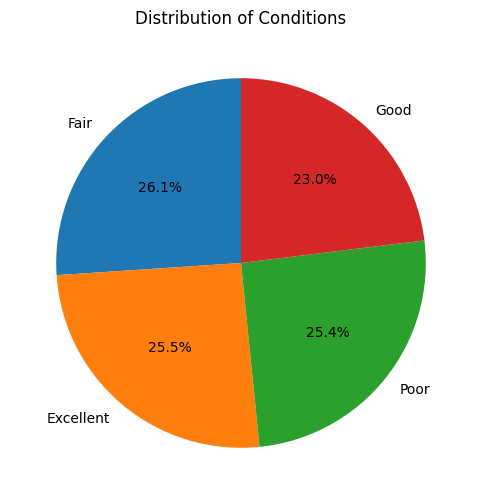

In [11]:
condition_counts = df['Condition'].value_counts()

# Create the pie chart
plt.figure(figsize=(6,6))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Conditions')

# Display the chart
plt.show()

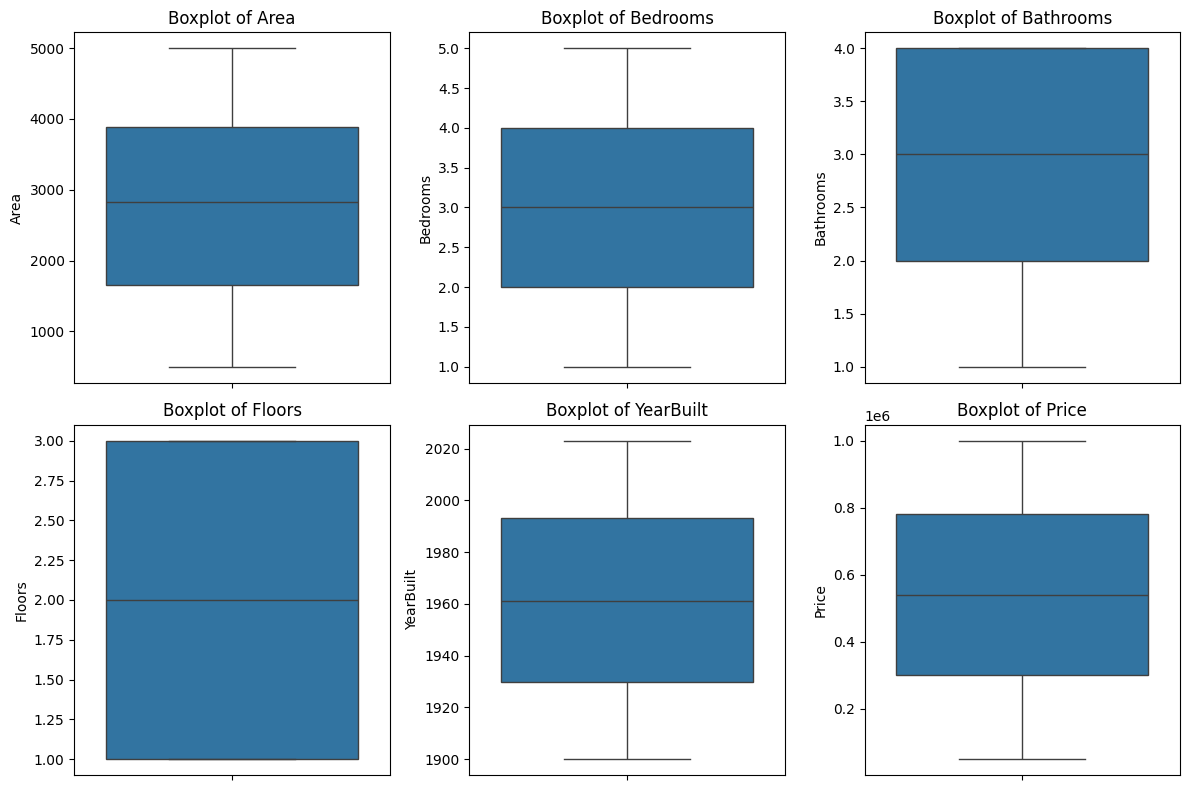

In [12]:
numerical_columns = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

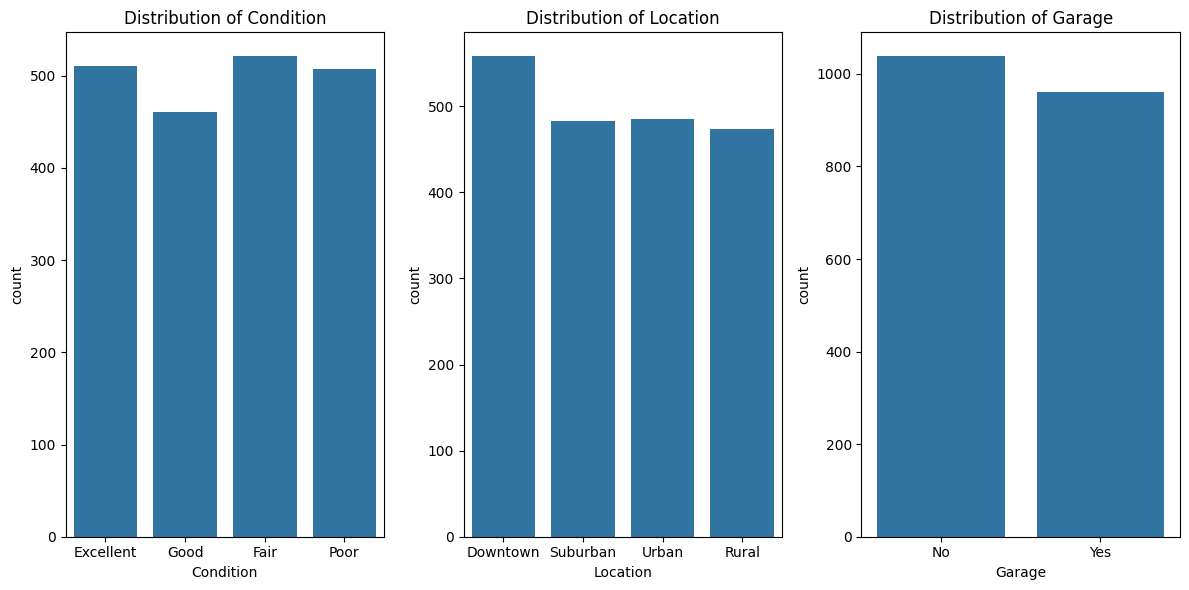

In [13]:
categorical_columns = ['Condition', 'Location', 'Garage']

plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_18240\563907570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Condition', y='Price', palette='Blues_d')


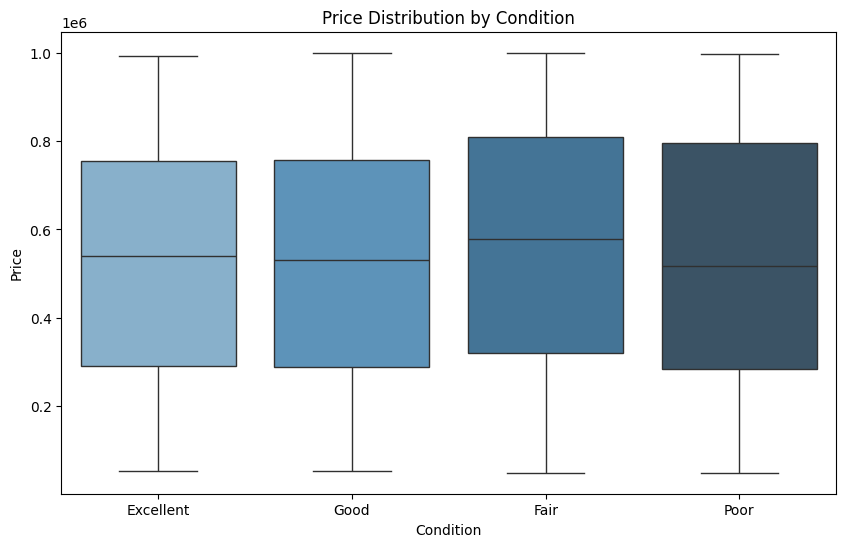

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Condition', y='Price', palette='Blues_d')
plt.title('Price Distribution by Condition')
plt.show()

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_cols = ['Location', 'Condition', 'Garage']
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols), index=df.index)

# Drop original categorical columns
df = df.drop(categorical_cols, axis=1)

# Concatenate the encoded columns to the DataFrame
df = pd.concat([df, encoded_df], axis=1)



In [16]:
df = df.drop("Id", axis=1)  # Drop the 'Id' column

# Define target variable
y = df['Price']

# Define feature matrix (excluding the target column)
X = df.drop("Price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)
# Calculate Mean Squared Error (MSE) and R-squared (R²) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²) score: {r2}')

Mean Squared Error (MSE): 78523897220.55922
R-squared (R²) score: -0.00931978944225853
